In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

# BaggingClassifier does not have feature_importance exposed
#from sklearn.ensemble import BaggingClassifier
#from sklearn.tree import DecisionTreeClassifier
import lime
import lime.lime_tabular
from __future__ import print_function
np.random.seed(1)
%matplotlib nbagg

In [5]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data"
input_feature_names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
input_dataframe = pd.read_csv(url, names=input_feature_names)

In [325]:
# To get more info about the data
%pycat https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.names

In [6]:
print(input_dataframe.head())

   preg  plas  pres  skin  test  mass   pedi  age  class
0     6   148    72    35     0  33.6  0.627   50      1
1     1    85    66    29     0  26.6  0.351   31      0
2     8   183    64     0     0  23.3  0.672   32      1
3     1    89    66    23    94  28.1  0.167   21      0
4     0   137    40    35   168  43.1  2.288   33      1


This is a binary classification problem.

In [9]:
input_class_names = input_dataframe['class'].unique()
print("Unique class names: {}".format(input_class_names))
# Not idealistically splitting into train, test and holdout
sss = StratifiedShuffleSplit(n_splits=2, test_size=0.3, random_state=0)
array = input_dataframe.values
X = array[:, 0:8]
Y = array[:, 8]
seed = 0
print(X[0])
print(sss.get_n_splits(X, Y))

Unique class names: [1 0]
[   6.     148.      72.      35.       0.      33.6      0.627   50.   ]
2


In [10]:
for train_index, test_index in sss.split(X, Y):
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]
    
print('Train set size: {}'.format(len(X_train)))
print('Test set size: {}'.format(len(X_test)))

Train set size: 537
Test set size: 231


In [16]:
# kfold = model_selection.KFold(n_splits=10, random_state=seed)
# cart = DecisionTreeClassifier()
num_trees = 500
init_model = RandomForestClassifier(n_estimators=num_trees, random_state=seed, oob_score=True)
# init_model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)
rf_model = init_model.fit(X_train, Y_train)
print(rf_model)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=500, n_jobs=1, oob_score=True, random_state=0,
            verbose=0, warm_start=False)


In [330]:
rf_model.predict_proba(X=X_test)

array([[ 0.666,  0.334],
       [ 0.856,  0.144],
       [ 0.89 ,  0.11 ],
       [ 0.872,  0.128],
       [ 0.372,  0.628],
       [ 0.588,  0.412],
       [ 0.24 ,  0.76 ],
       [ 0.99 ,  0.01 ],
       [ 0.324,  0.676],
       [ 0.754,  0.246],
       [ 0.918,  0.082],
       [ 0.914,  0.086],
       [ 0.32 ,  0.68 ],
       [ 0.91 ,  0.09 ],
       [ 0.96 ,  0.04 ],
       [ 0.836,  0.164],
       [ 0.962,  0.038],
       [ 0.192,  0.808],
       [ 0.314,  0.686],
       [ 0.264,  0.736],
       [ 0.536,  0.464],
       [ 0.794,  0.206],
       [ 0.996,  0.004],
       [ 0.518,  0.482],
       [ 0.888,  0.112],
       [ 0.894,  0.106],
       [ 0.24 ,  0.76 ],
       [ 0.36 ,  0.64 ],
       [ 0.754,  0.246],
       [ 0.888,  0.112],
       [ 0.85 ,  0.15 ],
       [ 0.876,  0.124],
       [ 0.226,  0.774],
       [ 0.786,  0.214],
       [ 0.544,  0.456],
       [ 0.782,  0.218],
       [ 0.334,  0.666],
       [ 0.576,  0.424],
       [ 0.998,  0.002],
       [ 0.302,  0.698],


In [17]:
print(classification_report(y_pred=rf_model.predict(X_test), y_true=Y_test))

             precision    recall  f1-score   support

        0.0       0.80      0.83      0.82       150
        1.0       0.67      0.62      0.64        81

avg / total       0.75      0.76      0.76       231



In [18]:
# Create an instance of the Local explainer
explainer = lime.lime_tabular.LimeTabularExplainer(X_train, feature_names=input_feature_names, 
                                                   class_names=input_class_names, discretize_continuous=True)

In [42]:
#i = np.random.randint(0, X_test.shape[0])
i = 37
print("Index:{}".format(i))
print("Actual Data:{}".format(X_test[i]))
print("Ground truth for index {}: {}".format(i, Y_test[i]))
print("Predicted label for index {}: {}".format(i, rf_model.predict(X_test[i])))
print(rf_model.predict_proba(X=X_test[i]))
print("Shape of the test dataset:{}".format(X_test.shape))
total_no_of_columns = X_test.shape[1]
%prun 
exp = explainer.explain_instance(X_test[i], rf_model.predict_proba, num_features=total_no_of_columns)

Index:37
Actual Data:[   4.    111.     72.     47.    207.     37.1     1.39   56.  ]
Ground truth for index 37: 1.0


/usr/local/lib/python2.7/dist-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


Predicted label for index 37: [ 0.]


/usr/local/lib/python2.7/dist-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


[[ 0.576  0.424]]
Shape of the test dataset:(231, 8)
 

[('99.00 < plas <= 114.00', -0.10951550158893292), ('mass > 36.50', 0.10142804519499592), ('pedi > 0.60', 0.10009922488039974), ('age > 41.00', 0.082210801680781487), ('skin > 32.00', 0.033687980497858663), ('3.00 < preg <= 6.00', -0.01394195976057926), ('62.00 < pres <= 72.00', 0.0035055978404967638), ('test > 125.00', -0.00089743247505808324)]


<IPython.core.display.Javascript object>


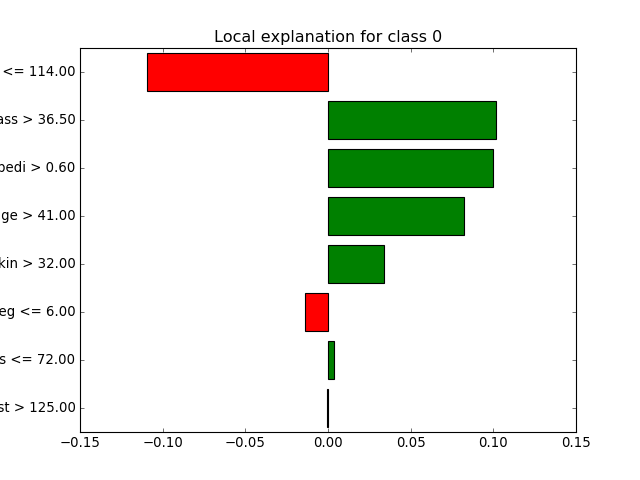

Figure(640x480)


In [32]:
# TODO: adjust the figure size
print(exp.as_list())
print(exp.as_pyplot_figure())

In [149]:
# Need to fix this error
# exp.show_in_notebook()

Feature ranking:
1. feature 1 (0.262393)
2. feature 5 (0.154748)
3. feature 7 (0.137939)
4. feature 6 (0.125177)
5. feature 0 (0.089901)
6. feature 2 (0.089896)
7. feature 3 (0.073056)
8. feature 4 (0.066891)
       0
0   preg
1   plas
2   pres
3   skin
4   test
5   mass
6   pedi
7    age
8  class


<IPython.core.display.Javascript object>


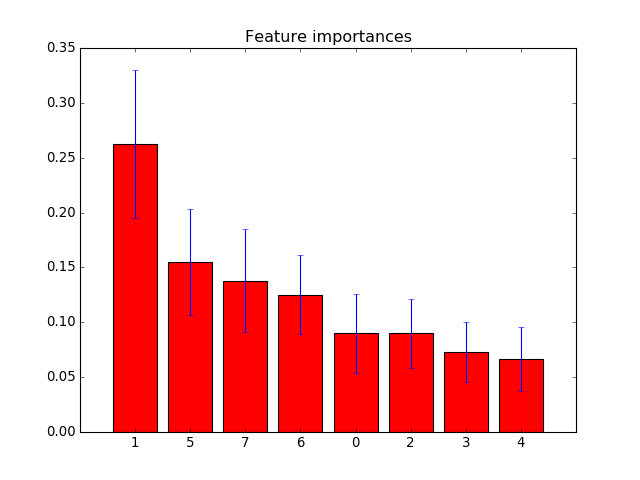

In [43]:
# Lets check out the variable importance to rank order the features
# TODO: map the index to feature names
importances = rf_model.feature_importances_
forest = rf_model

# plot the feature importance
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

print(pd.DataFrame(input_feature_names))    
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [232]:
# The information provided by Variable Importance is at the global level. 

In [44]:
# The question that ponders now, is how to improve the model performance ?
num_trees = 500
init_model = RandomForestClassifier(n_estimators=num_trees, random_state=seed, oob_score=True)
# init_model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)
feature_indexes = [3, 5, 6, 7]
sliced_feature_names = ['skin', 'mass', 'pedi', 'age']

In [45]:
rf_sub_model = init_model.fit(X_train[:, feature_indexes], Y_train)
print(classification_report(y_pred=rf_sub_model.predict(X_test[:,feature_indexes]), y_true=Y_test))

             precision    recall  f1-score   support

        0.0       0.76      0.81      0.79       150
        1.0       0.61      0.53      0.57        81

avg / total       0.71      0.71      0.71       231



In [50]:
i = 37
print("Index:{}".format(i))
print("Actual Data:{}".format(X_test[i, feature_indexes]))
print("Ground truth for index {}: {}".format(i, Y_test[i]))
print("Predicted label for index {}: {}".format(i, rf_sub_model.predict(X_test[i, feature_indexes])))
print("Likelihood of occurrence of each class: {}".format(rf_sub_model.predict_proba(X=X_test[i, feature_indexes])))
input_array = X_test[i, feature_indexes]
print("Sliced array shape: {}".format(input_array.shape))
total_no_of_columns = input_array.shape[0]
print("Number of columns in the sliced array: {}".format(total_no_of_columns))
#%prun 
print("Local input :{}".format(input_array))
print("Local input without slicing :{}".format(X_test[i]))

Index:37
Actual Data:[ 47.    37.1    1.39  56.  ]
Ground truth for index 37: 1.0


/usr/local/lib/python2.7/dist-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


Predicted label for index 37: [ 1.]


/usr/local/lib/python2.7/dist-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


Likelihood of occurrence of each class: [[ 0.344  0.656]]
Sliced array shape: (4,)
Number of columns in the sliced array: 4
Local input :[ 47.    37.1    1.39  56.  ]
Local input without slicing :[   4.    111.     72.     47.    207.     37.1     1.39   56.  ]


In [52]:
# As one can see above the prediction for that particular input improved. And if one interprets for confirmation that
# one would realize that the probability of all the contributing features in driving the prediction is quite high

[('age > 41.00', 0.17542271590647968), ('mass > 36.50', 0.15981508869659647), ('pedi > 0.60', 0.14026490370111772), ('skin > 32.00', 0.018580237634718444)]


<IPython.core.display.Javascript object>


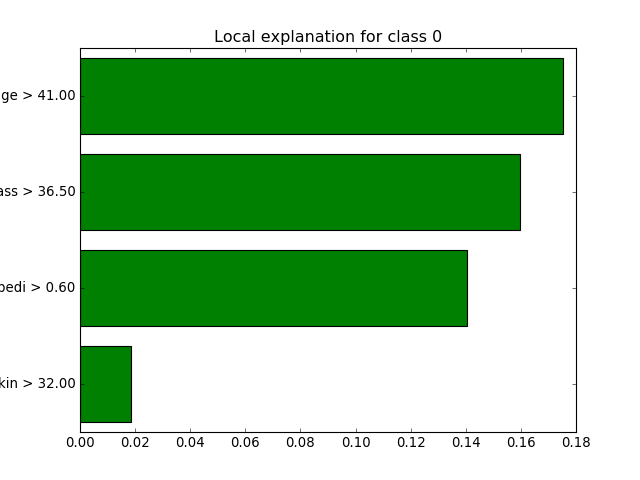

Figure(640x480)


In [51]:
explainer2 = lime.lime_tabular.LimeTabularExplainer(X_train[:, feature_indexes], feature_names=sliced_feature_names, 
                                                   class_names=input_class_names, discretize_continuous=True)
exp2 = explainer2.explain_instance(input_array, rf_sub_model.predict_proba, num_features=total_no_of_columns)
print(exp2.as_list())
print(exp2.as_pyplot_figure())